<a id='1'></a><center><h3 style="background-color:black; color:white" ><br><b>Project 1 - Netflix Data: Cleaning, Analysis and Visualization<br></h3>



- Name - Utsav Tyagi
- UNID - UMIP19076
- Email - utsavtyagi3456@gmail.com


# **Import Required Libraries**

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# **Load the Dataset**

In [3]:
df = pd.read_csv("netflix1.csv") # load the dateset into dataframe (df)

# **Analyzing Dataset**

In [40]:
df.head() # Displaying the first few rows of the dataset

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [41]:
print (df.shape) # To view the no. of rows and column
print ("No. of rows : ", df.shape[0]) # no. of rows
print ("No. of columns : ", df.shape[1]) # no. of columns

(8790, 10)
No. of rows :  8790
No. of columns :  10


In [42]:
print (df.info()) # More Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None


In [43]:
df.describe() 

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# **Data Cleaning**

#### **Check for Null values**

In [44]:
print (df.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


#### **Check for Non-null values**

In [45]:
print (df.notnull().sum())

show_id         8790
type            8790
title           8790
director        8790
country         8790
date_added      8790
release_year    8790
rating          8790
duration        8790
listed_in       8790
dtype: int64


#### **Check for Duplicate Rows**

In [46]:
dup = df.duplicated()
print ("Duplicated Rows : ")
dup

Duplicated Rows : 


0       False
1       False
2       False
3       False
4       False
        ...  
8785    False
8786    False
8787    False
8788    False
8789    False
Length: 8790, dtype: bool

#### **Removing rows with missing critical information**

In [47]:
df.dropna(subset = ['director', 'rating', 'country'], inplace = True)

#### **Convert 'date_added' to datetime**

In [48]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [49]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [50]:
print (df.dtypes) # Show date types to confirm changes made to 'date_added'

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


# **Exploratory Data Analysis (EDA)**

#### **Content Distribution on Netflix (Movies vs. TV Shows)**

In [51]:
type_count = df["type"].value_counts() # count no. of Movies and TV Shows
print (type_count)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


#### **Plot the distribution (bar)**

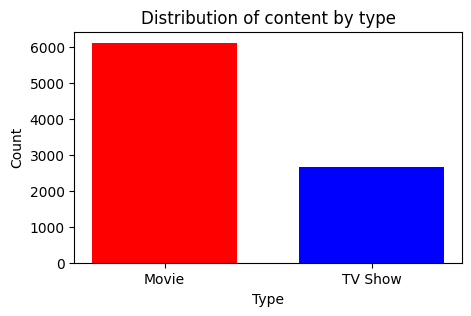

In [52]:
plt.figure(figsize = (5,3)) # width = 5, height = 3 
x = type_count.index # index[0] = Movies, index[1] = TV Shows
y = type_count.values
#plt.bar(x, y, color = 'red', width = 0.7) # width is used for gap between 2 bars
for i in range(len(x)):
    if i == 0:
        plt.bar(x[i], y[i], color = 'red', width = 0.7) # For 1st bar
    elif i == 1:
        plt.bar(x[i], y[i], color = 'blue', width = 0.7) # For 2nd bar
    else:
        plt.bar(x[i], y[i], color = 'green', width = 0.7) # For both bars

plt.title('Distribution of content by type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

#### **Pie Chart**

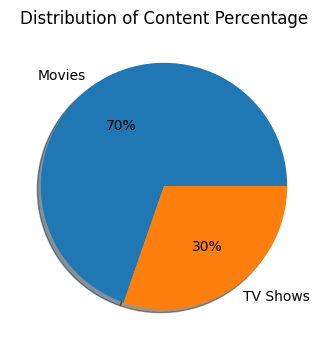

In [53]:
plt.figure(figsize = (6,4))
x = df['type'].value_counts()
my_labels = np.array(['Movies', 'TV Shows'])
plt.title('Distribution of Content Percentage')
plt.pie(x, labels = my_labels, shadow = True, autopct = '%.0f%%' )
plt.show()

#### **Yearly releases of Movies and TV Shows on Netflix**

In [54]:
yearly_movies_and_TV_Shows_releases = df['release_year'].value_counts()
print (yearly_movies_and_TV_Shows_releases)

release_year
2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: count, Length: 74, dtype: int64


In [55]:
# yearly_movie_releases information
yearly_movie_releases = df[df['type'] == 'Movie'].value_counts()
print (yearly_movie_releases)

show_id  type   title                                     director         country        date_added  release_year  rating  duration  listed_in                                                
s1       Movie  Dick Johnson Is Dead                      Kirsten Johnson  United States  2021-09-25  2020          PG-13   90 min    Documentaries                                                1
s6544    Movie  Crouching Tiger, Hidden Dragon            Ang Lee          Taiwan         2019-03-01  2000          PG-13   120 min   Action & Adventure, International Movies, Romantic Movies    1
s6553    Movie  Daemonium                                 Pablo Parés      Argentina      2016-12-20  2015          NR      115 min   Action & Adventure, Horror Movies, International Movies      1
s6552    Movie  Daddy Issues                              Amara Cash       United States  2019-09-20  2019          TV-MA   82 min    Dramas, Independent Movies, LGBTQ Movies                     1
s6551    Movie  Dadd

In [56]:
# yearly_TV_Shows_releases information
yearly_TV_Shows_releases = df[df['type'] == 'TV Show'].value_counts()
print (yearly_TV_Shows_releases)

show_id  type     title                                  director             country         date_added  release_year  rating  duration   listed_in                                                 
s100     TV Show  On the Verge                           Not Given            France          2021-09-07  2021          TV-MA   1 Season   TV Comedies, TV Dramas                                        1
s5404    TV Show  The Oath                               Not Given            Singapore       2017-07-01  2011          TV-14   1 Season   International TV Shows, Romantic TV Shows, TV Dramas          1
s5406    TV Show  The Ultimatum                          Not Given            Singapore       2017-07-01  2009          TV-14   1 Season   International TV Shows, TV Dramas                             1
s5407    TV Show  Unriddle                               Not Given            Singapore       2017-07-01  2012          TV-14   2 Seasons  Crime TV Shows, International TV Shows, TV Dramas     

In [57]:
yearly_movie_releases_count = df[df['type'] == 'Movie']['release_year'].value_counts()
print (yearly_movie_releases_count.head())

release_year
2018    767
2017    765
2016    658
2019    633
2020    517
Name: count, dtype: int64


In [58]:
yearly_TV_Shows_releases_count = df[df['type'] == 'TV Show']['release_year'].value_counts()
print (yearly_TV_Shows_releases_count.head())

release_year
2020    436
2019    397
2018    379
2021    315
2017    265
Name: count, dtype: int64


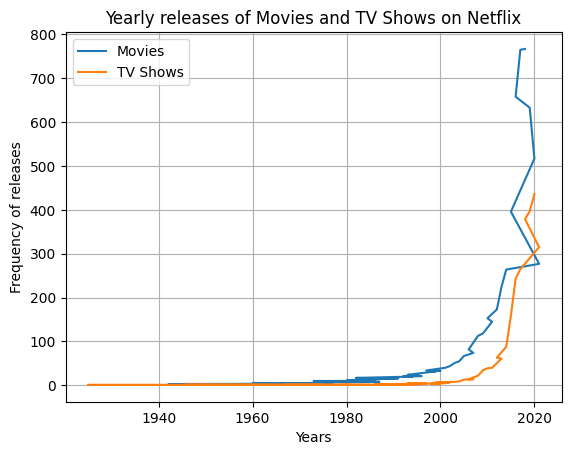

In [59]:
# For yearly_movie_releases
x = yearly_movie_releases_count.index
y = yearly_movie_releases_count.values

# For yearly_TV_Shows_releases
a = yearly_TV_Shows_releases_count.index
b = yearly_TV_Shows_releases_count.values

plt.plot(x, y, label = 'Movies')
plt.plot(a, b, label = 'TV Shows')

plt.title('Yearly releases of Movies and TV Shows on Netflix')
plt.xlabel('Years')
plt.ylabel('Frequency of releases')
plt.legend()
plt.grid(axis = 'both')
plt.show()

#### **Popular Movies**

In [60]:
Movies_name_count = df[df['type'] == 'Movie']['title'].value_counts()
print (Movies_name_count)

title
22-Jul                      2
15-Aug                      2
Dick Johnson Is Dead        1
Bottom of the World         1
Bobby Sands: 66 Days        1
                           ..
A Trip to Jamaica           1
6 Underground               1
Zindagi Na Milegi Dobara    1
Zero Hour                   1
Yoko and His Friends        1
Name: count, Length: 6124, dtype: int64


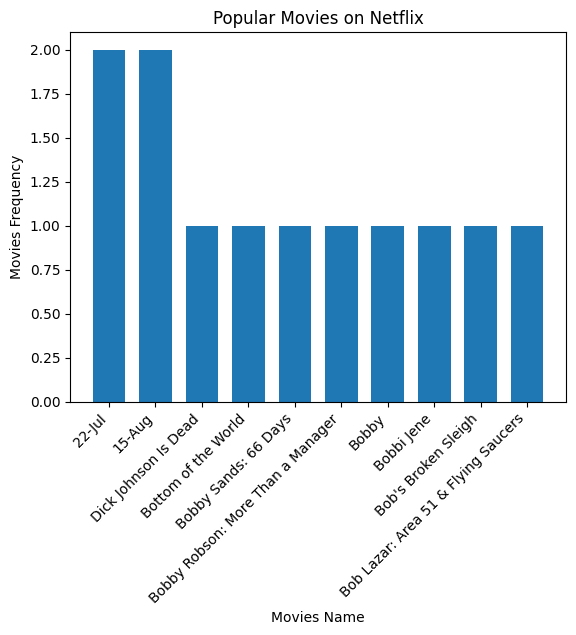

In [61]:
x = Movies_name_count.index[:10]
y = Movies_name_count.values[:10]
plt.bar(x, y, width = 0.7)
plt.title('Popular Movies on Netflix')
plt.xlabel('Movies Name')
plt.ylabel('Movies Frequency')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

#### **Top 10 Popular Genres for movies on Netflix**

In [62]:
popular_movie_genre = df[df['type'] == 'Movie']['listed_in'].value_counts()
print (popular_movie_genre)

listed_in
Dramas, International Movies                                 362
Documentaries                                                359
Stand-Up Comedy                                              334
Comedies, Dramas, International Movies                       274
Dramas, Independent Movies, International Movies             252
                                                            ... 
Horror Movies, International Movies, Sci-Fi & Fantasy          1
Action & Adventure, Children & Family Movies, Cult Movies      1
International Movies, Romantic Movies, Sci-Fi & Fantasy        1
Horror Movies, LGBTQ Movies, Music & Musicals                  1
Sports Movies                                                  1
Name: count, Length: 278, dtype: int64


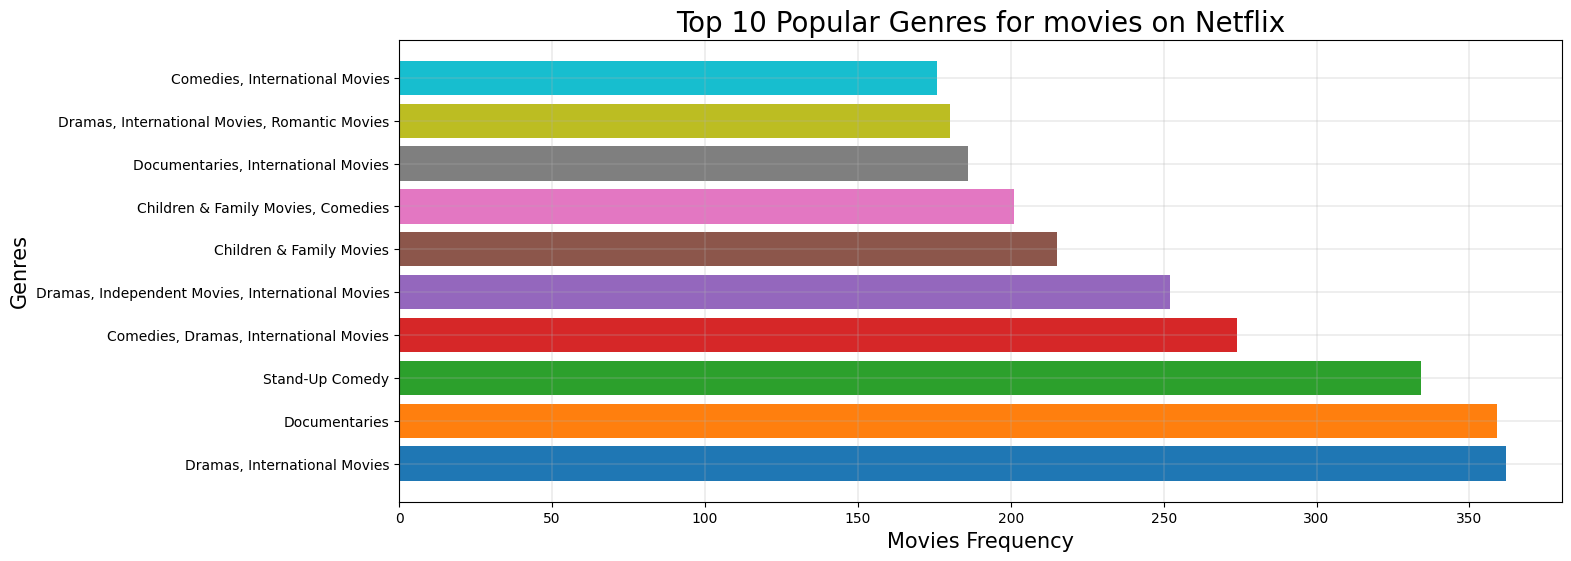

In [63]:
plt.figure(figsize = (15,6))
x = popular_movie_genre.index[:10]
y = popular_movie_genre.values[:10]
colors = plt.colormaps['tab10'](range(10)) # for different colors
plt.grid(linewidth = 0.3)
plt.barh(x, y, color = colors)
plt.title('Top 10 Popular Genres for movies on Netflix', fontsize = 20)
plt.xlabel('Movies Frequency', fontsize = 15)
plt.ylabel('Genres' , fontsize = 15)
plt.show()

#### **Top 10 Popular Genres for TV Shows on Netflix**

In [64]:
popular_TVShows_genre = df[df['type'] == 'TV Show']['listed_in'].value_counts()
print (popular_TVShows_genre)

listed_in
Kids' TV                                                219
International TV Shows, TV Dramas                       121
Crime TV Shows, International TV Shows, TV Dramas       110
Kids' TV, TV Comedies                                    97
Reality TV                                               95
                                                       ... 
Crime TV Shows, International TV Shows, TV Thrillers      1
Romantic TV Shows, TV Action & Adventure, TV Dramas       1
Romantic TV Shows, Teen TV Shows                          1
Anime Series, Kids' TV, TV Action & Adventure             1
Classic & Cult TV, Crime TV Shows, TV Dramas              1
Name: count, Length: 235, dtype: int64


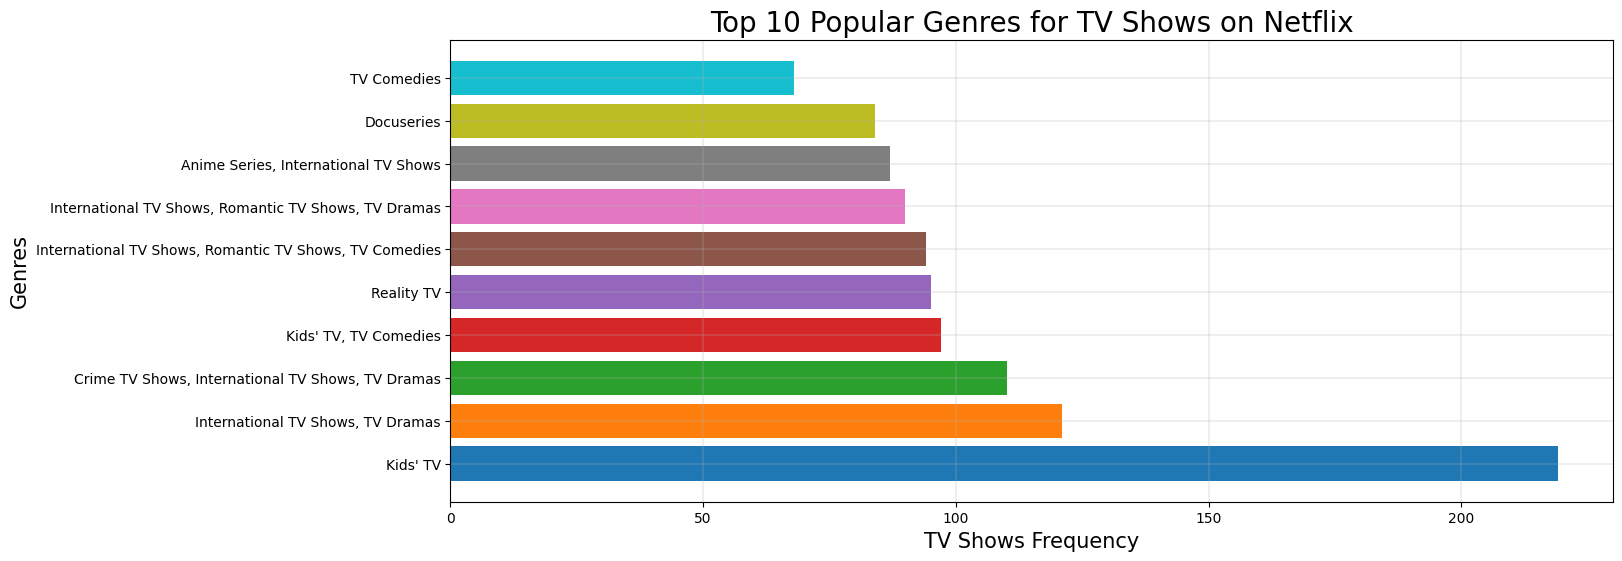

In [65]:
plt.figure(figsize = (15,6))
x = popular_TVShows_genre.index[:10]
y = popular_TVShows_genre.values[:10]
colors = plt.colormaps['tab10'](range(10)) # for different colors
plt.grid(linewidth = 0.3)
plt.barh(x, y, color = colors)
plt.title('Top 10 Popular Genres for TV Shows on Netflix', fontsize = 20)
plt.xlabel('TV Shows Frequency', fontsize = 15)
plt.ylabel('Genres' , fontsize = 15)
plt.show()

#### **Top 15 highest duration Movies on Netflix**

In [66]:
duration_count = df[df['type'] == 'Movie']['duration'].value_counts()
print (duration_count)

duration
90 min     152
93 min     146
94 min     146
97 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
312 min      1
Name: count, Length: 205, dtype: int64


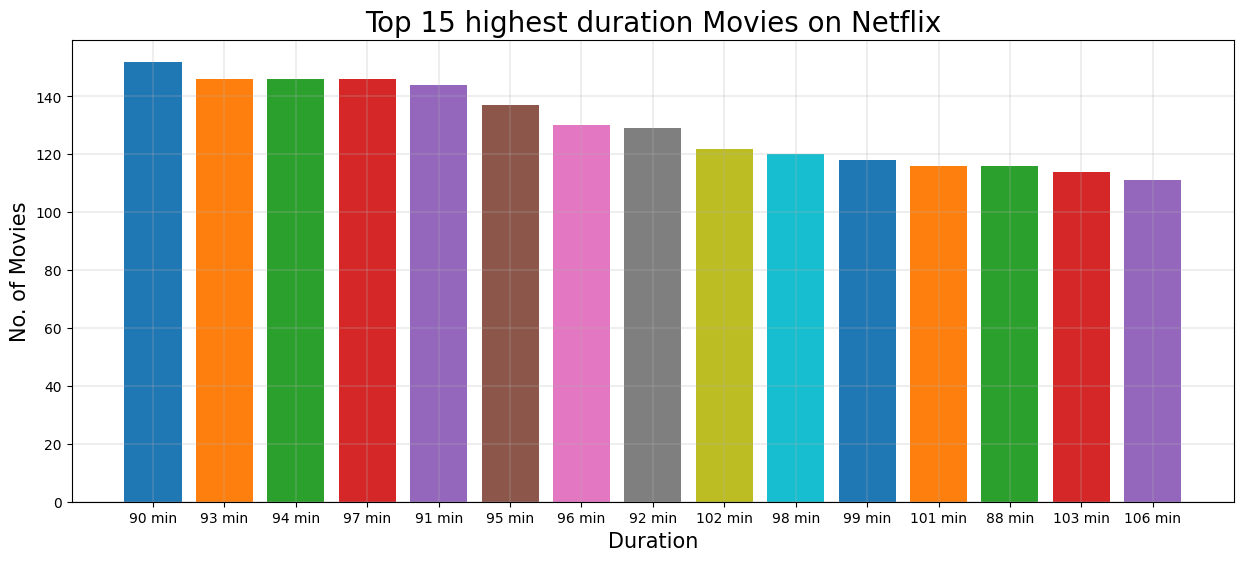

In [67]:
plt.figure(figsize = (15,6))
x = duration_count.index[:15]
y = duration_count.values[:15]
colors = plt.colormaps['tab10'](range(10)) # for different colors
plt.grid(linewidth = 0.3)
plt.bar(x, y, color = colors)
plt.title('Top 15 highest duration Movies on Netflix', fontsize = 20)
plt.xlabel('Duration', fontsize = 15)
plt.ylabel('No. of Movies' , fontsize = 15)
plt.show()

#### **Distribution of content rating on Netflix** 

In [68]:
rating_count = df['rating'].value_counts()
print (rating_count)

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


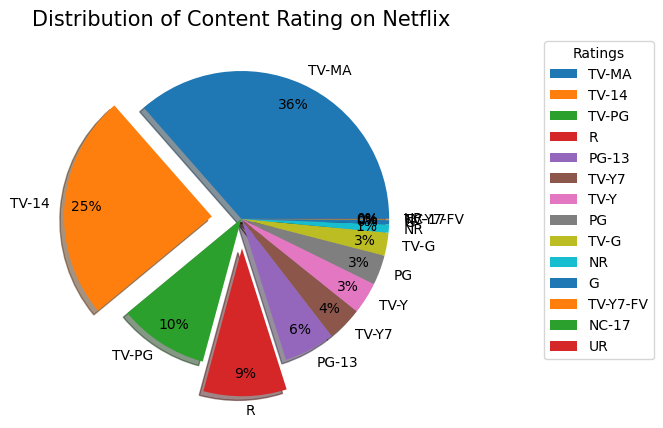

In [69]:
#plt.figure(figsize = (11,10))
x = df['rating'].value_counts()
my_labels = x.index
my_explode = [0.2 if i in ['R','TV-14'] else 0 for i in my_labels] # Exploding the specific 'R' and 'TV-14' rated Movies and TV Shows
plt.title('Distribution of Content Rating on Netflix', fontsize = 15)
plt.pie(x, labels = my_labels, shadow = True, autopct = '%.0f%%', labeldistance = 1.1, pctdistance = 0.85, explode = my_explode)
plt.legend(title = 'Ratings', bbox_to_anchor = (1.3, 1), loc = 'upper left')
plt.show()

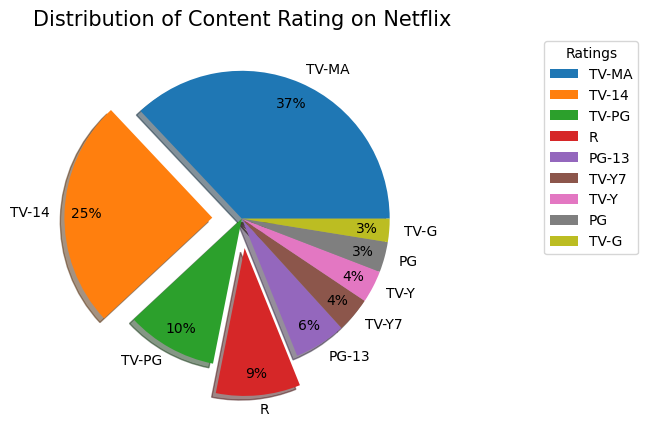

In [70]:
x = df['rating'].value_counts()
x_sliced = x.iloc[:9] # slice the data to include only the first 9 ratings (index 0 to 8)
my_labels = x_sliced.index # take x_sliced instead of x.index
my_explode = [0.2 if i in ['R','TV-14'] else 0 for i in my_labels] # Exploding the specific 'R' and 'TV-14' rated Movies and TV Shows
plt.title('Distribution of Content Rating on Netflix', fontsize = 15)
plt.pie(x_sliced, labels = my_labels, shadow = True, autopct = '%.0f%%', labeldistance = 1.1, pctdistance = 0.85, explode = my_explode)
plt.legend(title = 'Ratings', bbox_to_anchor = (1.3, 1), loc = 'upper left')
plt.show()

#### **Bar Graph**

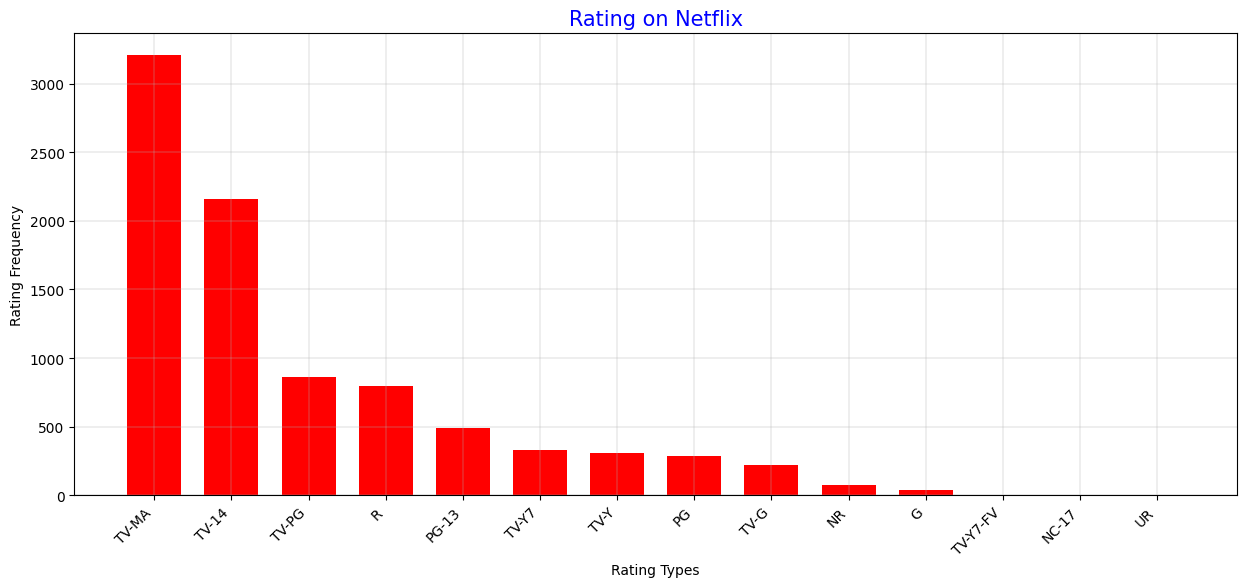

In [71]:
plt.figure(figsize = (15,6))
x = rating_count.index
y = rating_count.values
plt.bar(x, y, color = 'red', width = 0.7) # width is used for gap between 2 bars
plt.title('Rating on Netflix', fontsize = 15, color = 'Blue')
plt.xticks(rotation = 45 , ha = 'right')
plt.xlabel('Rating Types', fontsize = 10)
plt.ylabel('Rating Frequency', fontsize = 10)
plt.grid(axis = 'both', linewidth = 0.3)
plt.show()

#### **Top 10 Countries with most content on Netflix**

In [72]:
country_count = df['country'].value_counts()
print (country_count)

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64


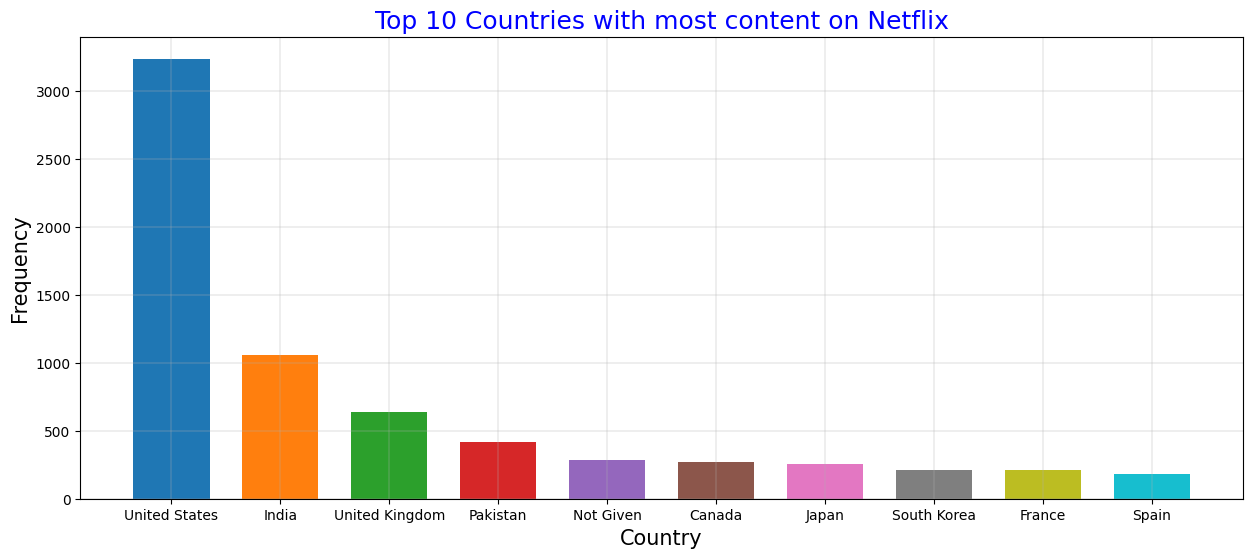

In [73]:
plt.figure(figsize = (15,6))
x = country_count.index[:10]
y = country_count.values[:10]
colors = plt.colormaps['tab10'](range(10)) # for different colors
plt.bar(x, y, width = 0.7, color = colors)
plt.title('Top 10 Countries with most content on Netflix', fontsize = 18, color = 'blue')
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
#plt.xticks(rotation = 45, ha = 'right')
plt.grid(axis = 'both', linewidth = 0.3)
plt.show()

In [74]:
# Create a folium map centered at [20, 0]
m = folium.Map(location=[20, 0], tiles="OpenStreetMap", zoom_start=2, min_zoom = 2, no_wrap = True, world_copy_jump = False, max_bounds=True)

# Coordinates for the top 10 countries
country_data = {
    'United States':{'coordinates' : [37.0902, -95.7129], 'color': 'red'},
    'United Kingdom': {'coordinates' : [55.3781, -3.4360], 'color': 'blue'},
    'Canada': {'coordinates' : [56.1304, -106.3468], 'color': 'purple'},
    'India': {'coordinates' : [20.5937, 78.9629], 'color': 'orange'},
    'France': {'coordinates' : [46.6034, 1.8883], 'color': 'pink'},
    'Japan': {'coordinates' : [36.2048, 138.2529], 'color': 'darkred'},
    'Pakistan': {'coordinates' : [30.3753, 69.3451], 'color': 'green'},
    'South Korea': {'coordinates' : [35.9078, 127.7669], 'color': 'black'},
    'Spain': {'coordinates' : [40.4637, -3.7492], 'color': 'lightblue'}
}

# Loop through the countries and add markers to the map
for country, data in country_data.items():
    folium.Marker(
        location = data['coordinates'],
        popup = country,
        icon = folium.Icon(color = data['color'], icon = "flag")
    ).add_to(m)

#folium.TileLayer('OpenStreetMap').add_to(m)
#folium.TileLayer('Stamen Toner', attr='Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.').add_to(m)
#folium.TileLayer('Stamen Terrain', attr='Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.').add_to(m)
#folium.TileLayer('Stamen Watercolor', attr='Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.').add_to(m)
#folium.TileLayer('CartoDB positron', attr='Map tiles by CartoDB, under CC BY 3.0. Data by OpenStreetMap, under ODbL.').add_to(m)
#folium.TileLayer('CartoDB dark_matter', attr='Map tiles by CartoDB, under CC BY 3.0. Data by OpenStreetMap, under ODbL.').add_to(m)
#folium.TileLayer('https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png', attr='Map tiles by OpenTopoMap, under CC BY-SA 3.0. Data by OpenStreetMap, under ODbL.').add_to(m)
#folium.TileLayer('https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}', attr='Esri, USGS, NOAA').add_to(m)
#folium.TileLayer('https://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/tile/{z}/{y}/{x}', attr='Esri, HERE, Garmin, FAO, USGS, NGA, GEBCO').add_to(m)

#folium.LayerControl().add_to(m)

# Display the map
m


#### **Top 15 Directors across Netflix**

In [4]:
directors_count = df['director'].value_counts()
print (directors_count)

director
Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: count, Length: 4528, dtype: int64


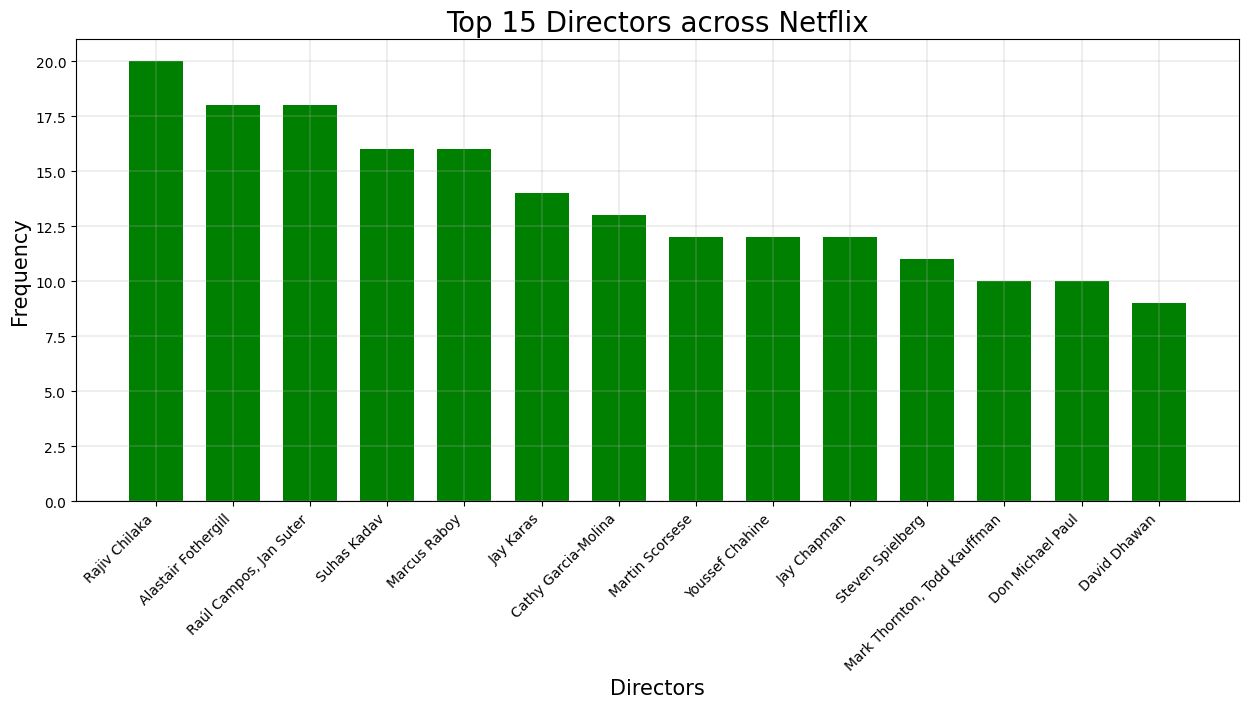

In [5]:
plt.figure(figsize = (15,6))
x = directors_count.index[1:15] # removing Not Given Directors
y = directors_count.values[1:15] # removing Not Given Directors
plt.bar(x, y, width = 0.7, color = 'green')
plt.title('Top 15 Directors across Netflix', fontsize = 20)
plt.xlabel('Directors', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation = 45, ha = 'right')
plt.grid(axis = 'both', linewidth = 0.3)
plt.show()